In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read both data frames
stereo_data = read_csv("/home/marcio/stage_project/data/output_analysis/sprint02/stereo_events_with_fluctuations_ensemble.csv", index_col=0)
parsivel_data = read_csv("/home/marcio/stage_project/data/output_analysis/sprint02/parsivel_events_with_fluctuations_ensemble.csv", index_col=0)

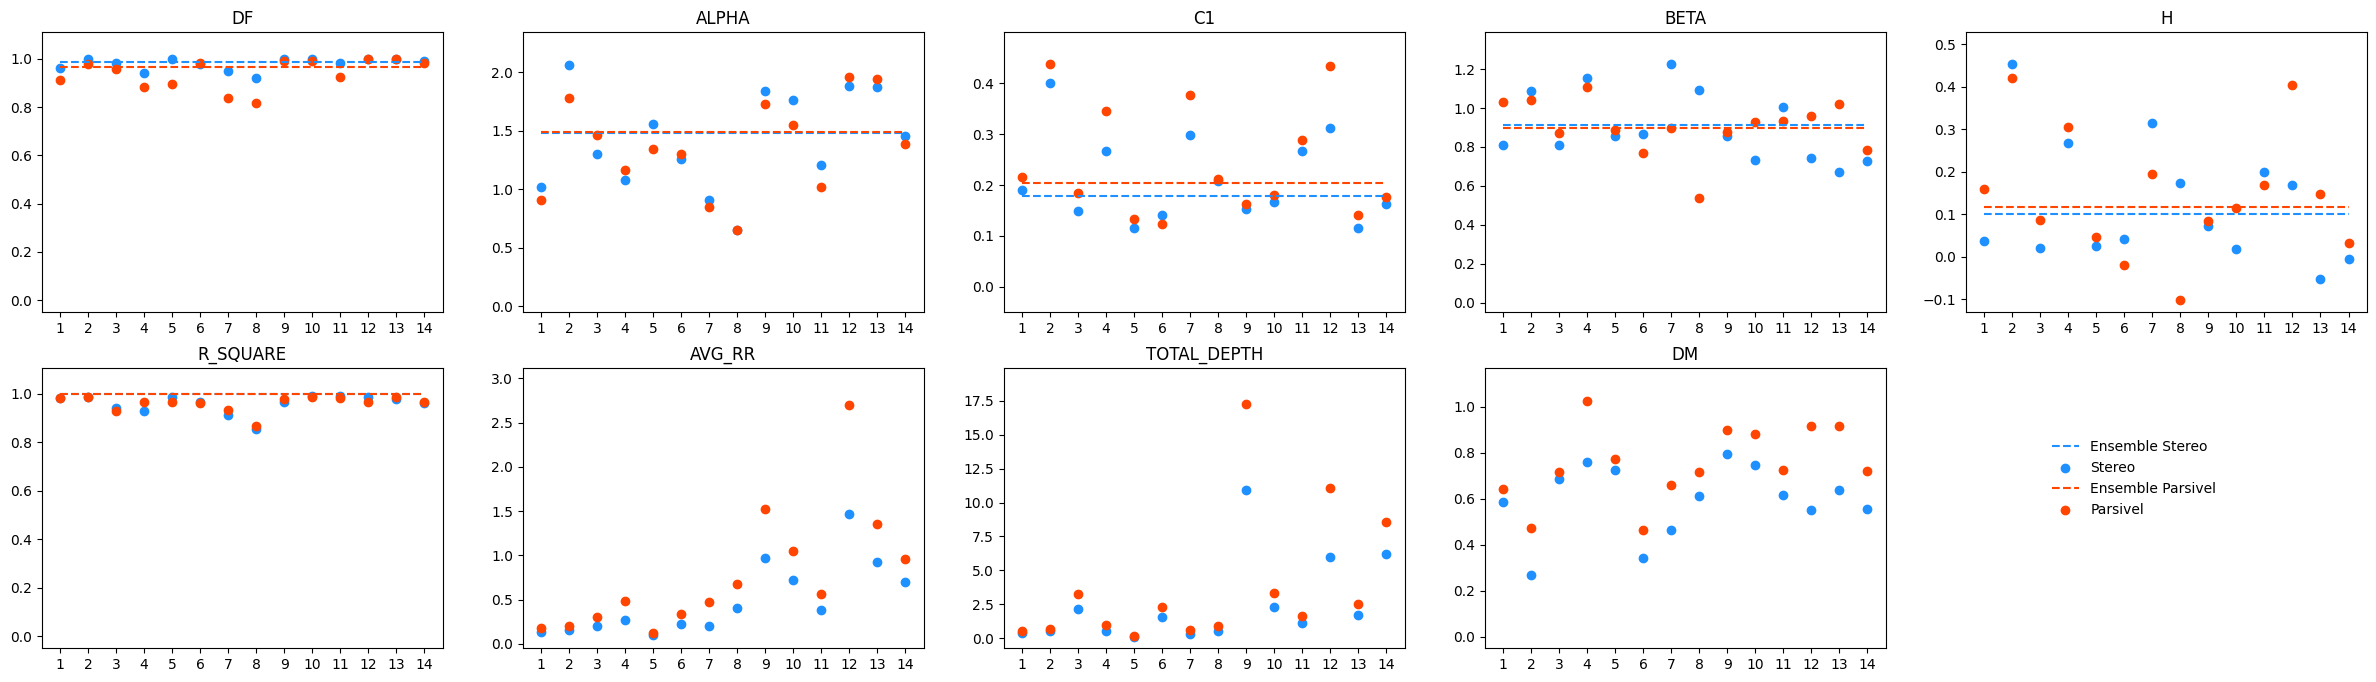

In [34]:
# Plot all of the fields
fields = ['df', 'alpha', 'c1', 'beta', 'h', 'r_square', 'avg_rr', 'total_depth', 'dm']
n_fields = len(fields)
# n_cols = int(np.ceil(np.sqrt(n_fields)))
# n_rows = int(n_fields // n_cols)
n_cols = 5
n_rows = 2

figure = plt.figure()
figure.set_size_inches((n_cols*6,n_rows*4))

x = np.arange(0,14) + 1
for idx, column in enumerate(fields, 1):
    ax = figure.add_subplot(n_rows, n_cols, idx)

    y = np.array(stereo_data[column][1:])

    # Plot the line for the average ensemble line
    hight = stereo_data.loc["ensemble_events",column]
    if hight !=0:
        ax.hlines(hight,1, 14, label= "Ensemble Stereo", linestyle="--", colors="dodgerblue")

    # Plot the graph
    ax.scatter(x,y, label="Stereo", c="dodgerblue")

    y = np.array(parsivel_data[column][1:])

    # Plot the line for the average ensemble line
    hight = parsivel_data.loc["ensemble_events",column]
    if hight !=0:
        ax.hlines(hight,1, 14, label= "Ensemble Parsivel", linestyle="--", colors="orangered")

    # Plot the graph
    ax.scatter(x,y, label="Parsivel", c="orangered")

    # Customize the axis
    ax.set_title(column.upper())
    ax.set_ybound(min(ax.get_ybound()[0], -0.05 ),ax.get_ybound()[1] * 1.1)
    ax.set_xticks(list(range(1,15)))
    if idx == 1:
        ax.legend(frameon=False, loc=(5.0,-.75))
